<a href="https://colab.research.google.com/github/mcrespo133/cd-2023-mauricio-crespo/blob/main/Proyecto_Segundo_Corte_Ciencia_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
pip install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
import pandas as pd


In [72]:
# from google.colab import files
# files.upload()
# df = pd.read_csv('eventos_dengue_2020.csv')

In [73]:
ruta = 'https://raw.githubusercontent.com/fmoreno4/datasets/main/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [74]:
df.dtypes

ID                     int64
fec_not               object
semana                 int64
año                    int64
edad_                  int64
uni_med_               int64
sexo_                 object
cod_pais_o             int64
cod_dpto_o             int64
cod_mun_o              int64
area_                  int64
ocupacion_             int64
tip_ss_               object
cod_ase_              object
gp_discapa             int64
gp_desplaz             int64
gp_migrant             int64
gp_carcela             int64
gp_gestan              int64
gp_calle               int64
gp_psiquia             int64
gp_vic_vio             int64
fecha_contagio        object
inicio_sintomas       object
pac_hos_               int64
fec_hos_              object
condicion_final        int64
fecha_defuncion      float64
fecha_nacimiento      object
certif_defuncion     float64
familiar_sintomas      int64
fiebre                 int64
cefalea                int64
dolor_retroocular      int64
mialgias      

In [75]:
#Se formatean los datos de fecha
from datetime import datetime

df['fec_not2'] = pd.to_datetime(df['fec_not'], format="%d/%m/%Y")
df['fecha_contagio2'] = pd.to_datetime(df['fecha_contagio'], format="%d/%m/%Y")
df['inicio_sintomas2'] = pd.to_datetime(df['inicio_sintomas'], format="%d/%m/%Y")
df['fec_hos_2'] = pd.to_datetime(df['fec_hos_'], format="%d/%m/%Y")

In [76]:
#Creación de la proyección
import pyproj

P = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)

In [77]:
#Se convertirán las coordenadas geográficas a UTM
df['x'], df['y'] = P(df['longitud'], df['latitud'])
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,aum_hematocrito,conducta,latitud,longitud,fec_not2,fecha_contagio2,inicio_sintomas2,fec_hos_2,x,y
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,1. Ambulatorio,7.076011,-73.102501,2020-01-17,2020-01-17,2020-01-10,NaT,709584.027559,782579.281866
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,1. Ambulatorio,7.079495,-73.105400,2020-01-10,2020-01-10,2020-01-07,NaT,709262.121378,782963.354103
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,1. Ambulatorio,7.090290,-73.091003,2020-01-12,2020-01-12,2020-01-08,NaT,710847.924654,784163.825097
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,1. Ambulatorio,7.067435,-73.090958,2020-01-12,2020-01-10,2020-01-06,NaT,710863.366771,781635.895608
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2. Hospitalizacion piso,7.066905,-73.104980,2020-01-10,2020-01-10,2020-01-07,2020-01-10,709314.159319,781570.969374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,1. Ambulatorio,7.072610,-73.099487,2020-03-07,2020-03-06,2020-03-03,NaT,709918.546763,782204.438977
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,1,2. Hospitalizacion piso,7.065252,-73.103607,2020-03-13,2020-03-13,2020-03-06,2020-03-13,709466.644754,781388.734012
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,1. Ambulatorio,7.091391,-73.103264,2020-03-08,2020-03-08,2020-03-04,NaT,709492.782783,784279.996264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,1. Ambulatorio,7.061083,-73.097000,2020-03-11,2020-03-11,2020-03-05,NaT,710198.574916,780930.648555


In [78]:
df.isna().sum()

ID                      0
fec_not                 0
semana                  0
año                     0
edad_                   0
uni_med_                0
sexo_                   0
cod_pais_o              0
cod_dpto_o              0
cod_mun_o               0
area_                   0
ocupacion_              0
tip_ss_                 0
cod_ase_                9
gp_discapa              0
gp_desplaz              0
gp_migrant              0
gp_carcela              0
gp_gestan               0
gp_calle                0
gp_psiquia              0
gp_vic_vio              0
fecha_contagio          2
inicio_sintomas         2
pac_hos_                0
fec_hos_             1014
condicion_final         0
fecha_defuncion      1262
fecha_nacimiento        0
certif_defuncion     1262
familiar_sintomas       0
fiebre                  0
cefalea                 0
dolor_retroocular       0
mialgias                0
artralgia               0
erupcion                0
dolor_abdomen           0
vomito      

In [79]:
# Creamos un dataframe que tenga unicamente ID, x & y
df2 = df[['ID', 'x', 'y']].copy()

In [80]:
df2

,ID,x,y
0,1,709584.027559,782579.281866
1,2,709262.121378,782963.354103
2,3,710847.924654,784163.825097
3,4,710863.366771,781635.895608
4,5,709314.159319,781570.969374
...,...,...,...
1257,1258,709918.546763,782204.438977
1258,1259,709466.644754,781388.734012
1259,1260,709492.782783,784279.996264
1260,1261,710198.574916,780930.648555


In [81]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [82]:
import urllib.request
import math

import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
import geopandas as gpd
import random
from shapely.geometry import Point, Polygon, shape

In [83]:
#Se carga la cartografía de Floridablanca
url = 'https://foscal.net/cartografia/'

file_list = ["68276_urbano.cpg", "68276_urbano.dbf", "68276_urbano.prj", "68276_urbano.qmd", "68276_urbano.shp", "68276_urbano.shx"]

for file in file_list:
    urllib.request.urlretrieve(url+file, file)

In [84]:
polygons = gpd.read_file('68276_urbano.shp')
polygons = polygons.to_crs({'init':'epsg:32618'})

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [85]:
print(polygons)

  DPTO_CCDGO MPIO_CCDGO CLAS_CCDGO  Shape_Leng  Shape_Le_1  Shape_Area  \
0         68        276          1    0.290693    0.290693    0.001393   

                                            geometry  
0  POLYGON ((712728.126 781869.140, 712728.588 78...  


In [86]:
puntos = pd.DataFrame(df2, columns = ['x', 'y']).to_numpy()
puntos

array([[709584.02755874, 782579.28186627],
       [709262.12137799, 782963.35410304],
       [710847.92465398, 784163.82509702],
       ...,
       [709492.78278312, 784279.99626355],
       [710198.57491572, 780930.64855507],
       [712027.27741723, 781097.16920956]])

In [87]:
# Se define la resolución y el ancho de banda
res = 10
bw = 200

In [88]:
# Buscar los minimos y maximos del mapa
xmin = 1000000
xmax = 0
ymin = 1000000
ymax = 0
for x in puntos:
  if x[0] > xmax:
    xmax = x[0]
  if x[0] < xmin:
    xmin = x[0]
  if x[1] > ymax:
    ymax = x[1]
  if x[1] < ymin:
    ymin = x[1]

xmin = math.floor(xmin/10) * 10 - bw # Se toma en cuenta el bw para evitar que hayan errores cuando se evalúen los puntos cercanos a las esquinas
xmax = math.ceil(xmax/10) * 10 + bw
ymin = math.floor(ymin/10) * 10 - bw
ymax = math.ceil(ymax/10) * 10 + bw

# Se utiliza la opción de dividir y luego multiplicar por 10, de esta manera se garantiza que el numero será un múltiplo de 10.
# En este caso que la res = 10, está perfecto, sin embargo en el caso de que se utilice otra Res, se debería ajustar.

print(f"x min:", xmin)
print(f"x max:", xmax)
print(f"y min:", ymin)
print(f"y max:", ymax)

x min: 707780
x max: 712570
y min: 780300
y max: 785260


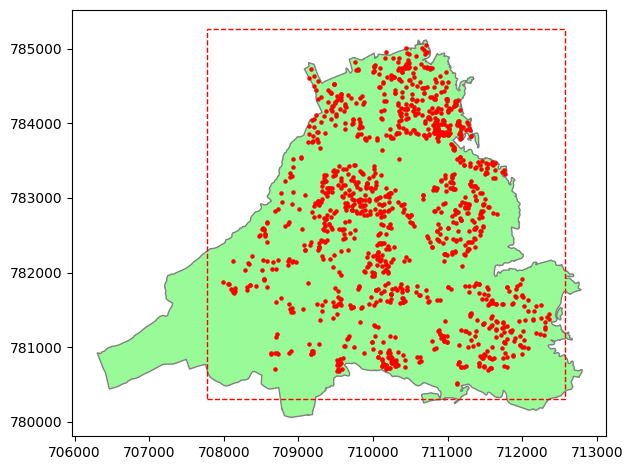

In [89]:
fig, ax = plt.subplots()
polygons.plot(ax=ax, facecolor='palegreen', edgecolor='gray');
rectangle = plt.Rectangle((xmin,ymin), xmax-xmin, ymax-ymin, fc="none", ec="red", linestyle="dashed")
plt.gca().add_patch(rectangle)
plt.tight_layout()
ax.scatter(*zip(*puntos), s=5, c='red')

# ***Matriz de Conteo***

In [90]:
# Primero se debe hallar el tamaño de la matriz, para esto se restan los max y los mins, y se divide entre la resolución

tamanox = round((xmax - xmin) / res)
tamanoy = round((ymax - ymin) / res)
print(f"Número de filas:", tamanoy, ", número de columnas:", tamanox)

Número de filas: 496 , número de columnas: 479


In [91]:
matrizConteo = [[0 for _ in range(tamanox)] for _ in range(tamanoy)]

In [92]:
for i in puntos:
  coordx = round((i[0] - xmin)/10)
  coordy = round((ymax - i[1])/10) # Nota: Si los puntos en el mapa quedan al revés, cambiar por ymax 
  matrizConteo[coordy][coordx] += 1

In [93]:
import sys
import numpy as np
matrizConteo2 = np.matrix(matrizConteo)
matrizConteo2

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [94]:
# Verificamos que la matriz de conteo incluya todos los puntos
acumulador = 0
for x in matrizConteo:
  for y in x:
    if y > 0:
      acumulador = acumulador + y
print(acumulador)
print(len(puntos))

1262
1262


# ***Funcion Kernel***

In [95]:
def kernel(dist, bw, func):
  # 1: Epanechnikov
  # 2: Uniforme
  # 3: Triangular
  # 4: Gaussiana
  u = dist/bw
  if dist > bw:
    return 0
  else:
    if func == 1:
      return (3/4)*(1-u**2)  # Epanechnikov
    if func == 2:
      return (1/2)              # Uniforme
    if func == 3:
      return (1-abs(u))      # Triangular
    if func == 4:
      return (1/((2*math.pi)**(1/2)))*math.e**((-1/2)*(u**2)) #Gaussiana

# ***Matriz de Densidades***

In [96]:
matrizDensidades = [[0 for _ in range(tamanox)] for _ in range(tamanoy)]
matrizDensidades2 = np.matrix(matrizDensidades)
matrizDensidades2

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [97]:
# Se llena la matriz de densidades usando Epanechnikov
contadorx = 0
contadory = 0
z = 0
bw = 200
listaDensidades = []
print("0%                                                                100%")
for i in matrizDensidades:
  for j in i:
    x = contadorx * res + xmin
    y = ymax - contadory * res # Nota: Si los puntos en el mapa quedan al revés, cambiar por ymin 
    coord = [x,y]
    z = 0
    for k in puntos:
      dist = math.dist(coord, k)
      z += kernel(dist, bw, 1)
    listaDensidades.append(z)
    contadory = contadory + 1
  contadorx = contadorx + 1
  contadory = 0
  if contadorx % 7 == 0:
    print("|", end="")

0%                                                                100%
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

In [98]:
listaDensidades2 = np.array(listaDensidades)
matrizDensidades = listaDensidades2.reshape(tamanoy, tamanox)
matrizDensidades = matrizDensidades.transpose()
# len(listaDensidades2)

In [99]:
listaDensidades2.sum()

594366.706738025

# ***Mapas de Calor de prueba***

<Axes: >

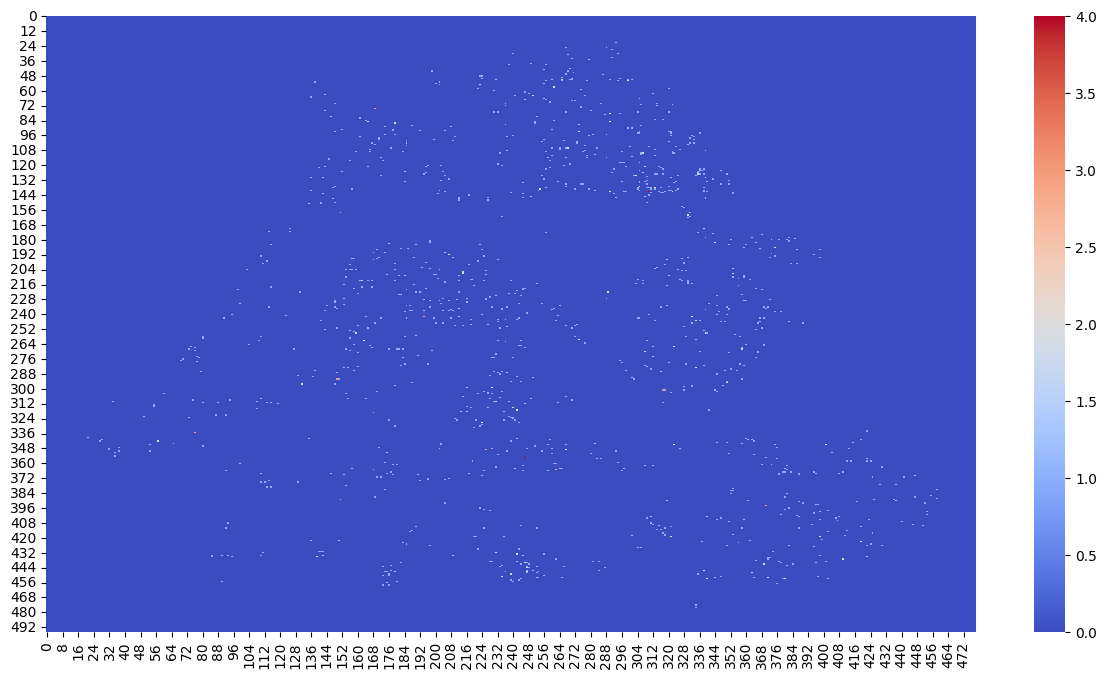

In [100]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(matrizConteo, cmap="coolwarm")

<Axes: >

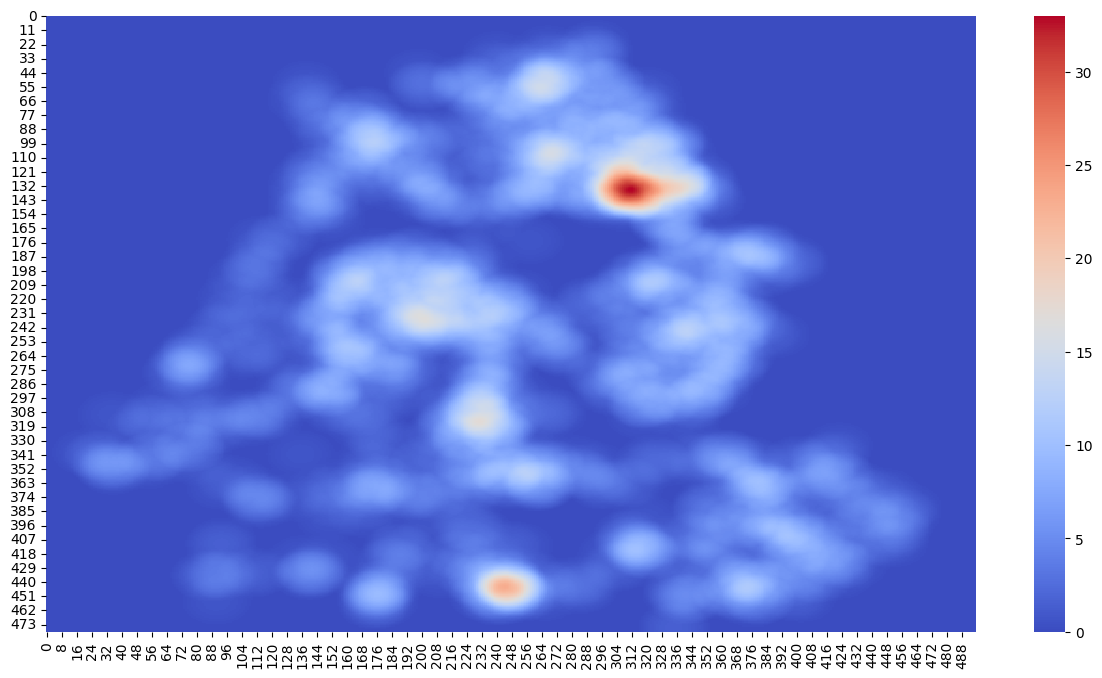

In [101]:
plt.figure(figsize=(15,8))
sns.heatmap(matrizDensidades, cmap="coolwarm")

# ***Gamas de Colores***

In [102]:
# Generamos las gamas de colores:
import colorsys

from matplotlib.colors import ListedColormap, LinearSegmentedColormap

def create_color(r, g, b):
  return [r/256, g/256, b/256]

def generar_gama(ri, gi, bi, rf, gf, bf, alfa, cantidad):
  hsvi = colorsys.rgb_to_hsv(ri, gi, bi)
  hsvf = colorsys.rgb_to_hsv(rf, gf, bf)  
  hi = hsvi[0]
  si = hsvi[1]
  vi = hsvi[2]
  hf = hsvf[0]
  sf = hsvf[1]
  vf = hsvf[2]
  pasoh = (hf - hi) / (cantidad - 1)
  pasos = (sf - si) / (cantidad - 1)
  pasov = (vf - vi) / (cantidad - 1)
  lista_rgb = []
  rgb = (ri,gi,bi)

  for i in range(cantidad):
    lista_rgb.append(rgb)
    print(f'\033[48;2;{rgb[0]};{rgb[1]};{rgb[2]}m{"   "}\033[0m', end="")
    hi += pasoh
    si += pasos
    vi += pasov
    rgb = colorsys.hsv_to_rgb(hi, si, vi)
    rgb = (round(rgb[0]), round(rgb[1]), round(rgb[2])) #0-1 to 0-255
  print(" ")
  return lista_rgb

# Convertir RGB a HSV
# Definir el tamaño de los pasosh, pasoss, pasosv (colori-colorf/cantidad-1)


In [103]:
# Color inicial: Verde Claro: R 152, G 251, B 152
# Color final: Rojo: R 237, G 28, B 36

lista = generar_gama(152, 251, 152, 237, 28, 36, 1, 8)
lista
listacorta = []
for i in lista:
  listacorta.append(create_color(i[0], i[1], i[2]))
listacorta

[[0.59375, 0.98046875, 0.59375],
 [0.51953125, 0.97265625, 0.77734375],
 [0.44921875, 0.8984375, 0.96484375],
 [0.37890625, 0.5546875, 0.95703125],
 [0.48046875, 0.30859375, 0.94921875],
 [0.82421875, 0.2421875, 0.94140625],
 [0.93359375, 0.17578125, 0.6328125],
 [0.92578125, 0.109375, 0.140625]]

In [104]:
def generar_gama_rgb(ri, gi, bi, rf, gf, bf, alfa, cantidad):
  pasor = (rf - ri) / (cantidad - 1)
  pasog = (gf - gi) / (cantidad - 1)
  pasob = (bf - bi) / (cantidad - 1)
  lista_rgb = []
  rgb = (ri, gi, bi)

  for i in range(cantidad):
    print(f'\033[48;2;{rgb[0]};{rgb[1]};{rgb[2]}m{"   "}\033[0m', end="")
    lista_rgb.append(rgb)
    ri += pasor
    gi += pasog
    bi += pasob
    rgb = (round(ri), round(gi), round(bi))
  print(" ")
  return lista_rgb

In [105]:
# Color inicial: Verde Claro: R 152, G 251, B 152
# Color final: Rojo: R 237, G 28, B 36

# Se crea la paleta sin hacer la transición a HSV para comparar ambas paletas generadas

lista2 = generar_gama_rgb(152, 251, 152, 237, 28, 36, 1, 8)
lista2corta = []
for i in lista2:
  lista2corta.append(create_color(i[0], i[1], i[2]))
lista2corta

[[0.59375, 0.98046875, 0.59375],
 [0.640625, 0.85546875, 0.52734375],
 [0.6875, 0.73046875, 0.46484375],
 [0.734375, 0.60546875, 0.3984375],
 [0.78515625, 0.484375, 0.3359375],
 [0.83203125, 0.359375, 0.26953125],
 [0.87890625, 0.234375, 0.20703125],
 [0.92578125, 0.109375, 0.140625]]

In [106]:
def get_custom_color_palette(lista):
  return LinearSegmentedColormap.from_list("", lista)

# ***Mapas de calor, con las paletas de colores custom***

<Axes: >

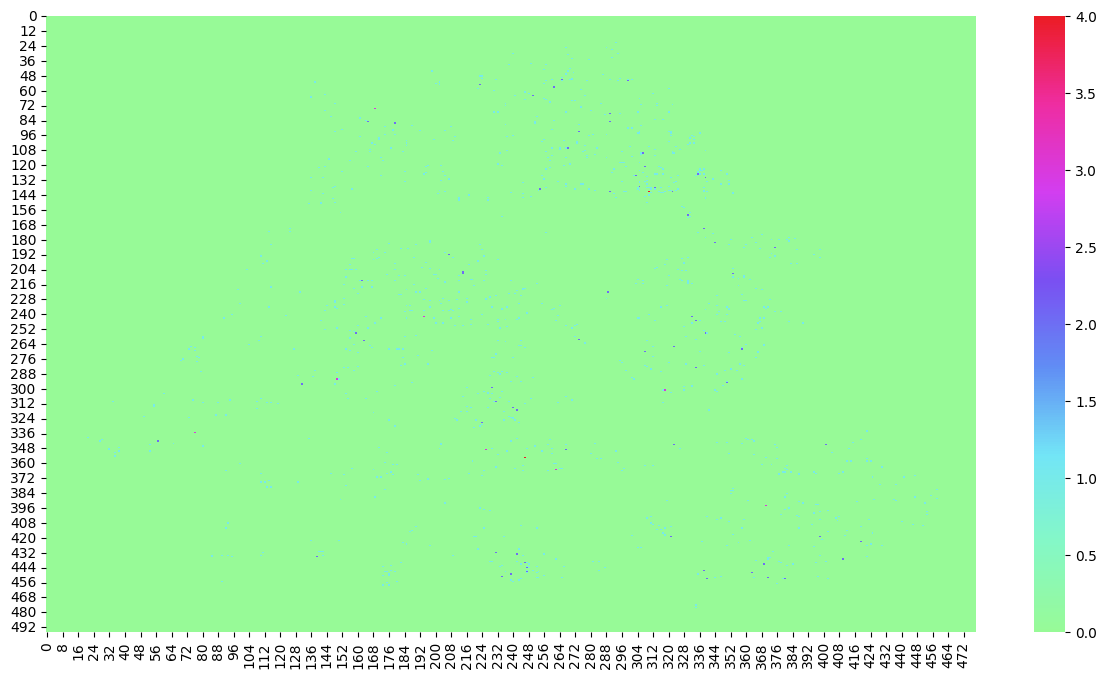

In [107]:
cmap = get_custom_color_palette(listacorta)
plt.figure(figsize=(15,8))
sns.heatmap(matrizConteo, cmap=cmap)

<Axes: >

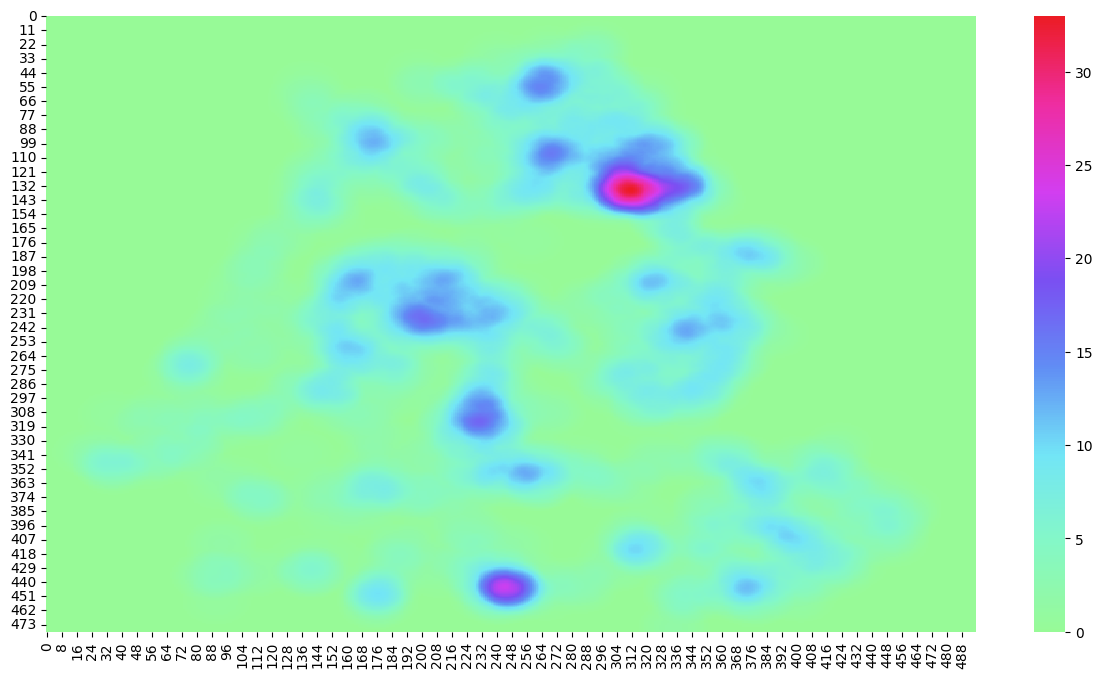

In [108]:
cmap = get_custom_color_palette(listacorta)
plt.figure(figsize=(15,8))
sns.heatmap(matrizDensidades, cmap=cmap)

<Axes: >

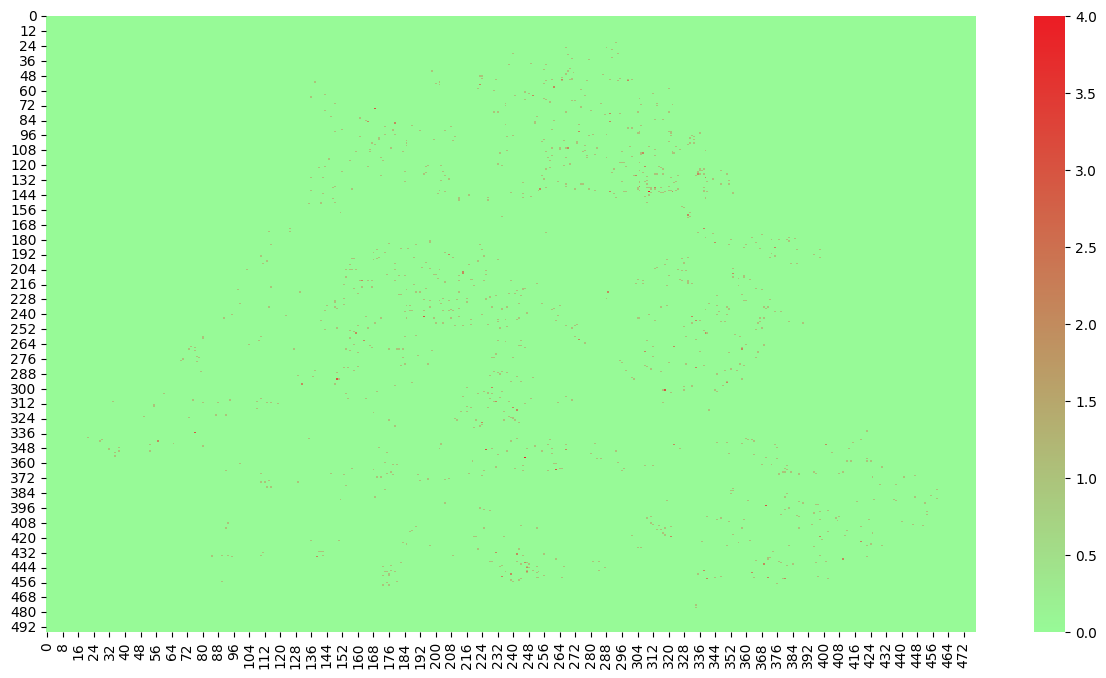

In [109]:
cmap = get_custom_color_palette(lista2corta)
plt.figure(figsize=(15,8))
sns.heatmap(matrizConteo, cmap=cmap)

<Axes: >

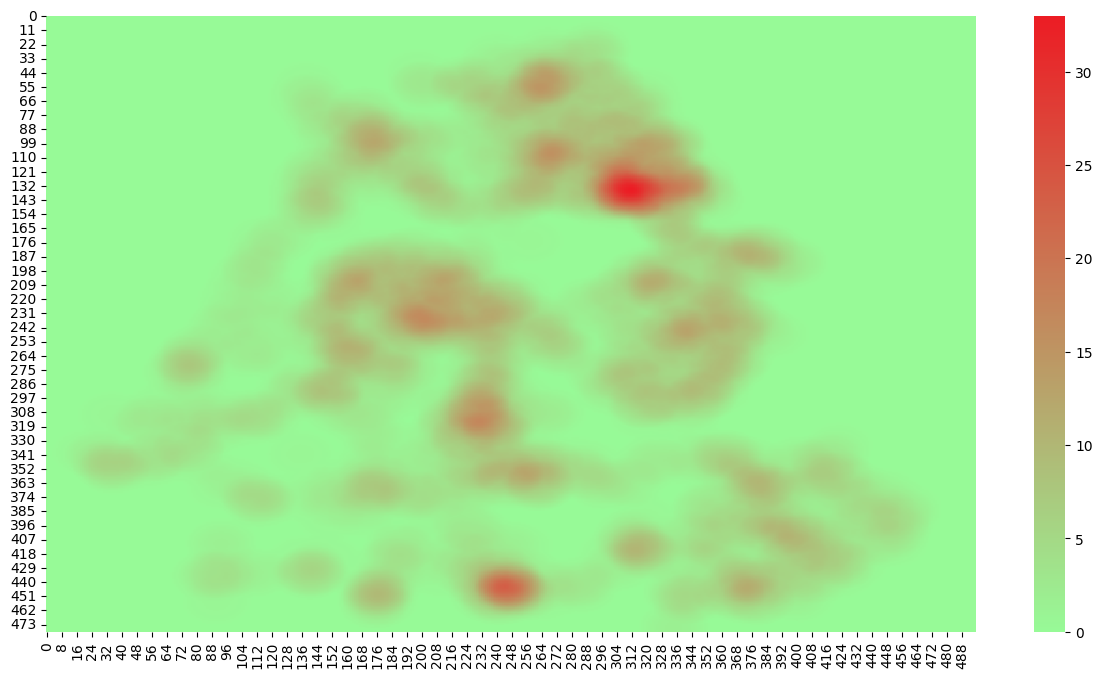

In [110]:
cmap = get_custom_color_palette(lista2corta)
plt.figure(figsize=(15,8))
sns.heatmap(matrizDensidades, cmap=cmap)